In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import findspark
findspark.init("/usr/local/spark/")
import pyspark

In [3]:
from pyspark.sql import *
from pyspark.sql import functions as F
from pyspark.sql.types import *

In [4]:
from pyspark.sql import SparkSession
appName = "PySpark Project1"


spark = SparkSession.builder.appName(appName).getOrCreate()

###.enableHiveSupport() add it later

### Note:
        Reading in the data.

In [5]:
data="/home/hduser/Desktop/Pyspark Project/Customer_and_bank details_p1.csv"
data_campaign = "/home/hduser/Desktop/Pyspark Project/Customer_campaign_details_p1.csv"
data_citymaster="/home/hduser/Desktop/Pyspark Project/City_Master.csv"
data_postalcode="/home/hduser/Desktop/Pyspark Project/Customer_Postal_Code_details.csv"
data_response="/home/hduser/Desktop/Pyspark Project/Customer_Response_data_p1.csv"
data_socioeco="/home/hduser/Desktop/Pyspark Project/Customer_social_economic_data_p1.csv"
data_regionmaster="/home/hduser/Desktop/Pyspark Project/Region_code_master.csv"
data_statemaster="/home/hduser/Desktop/Pyspark Project/State_Master.csv"
###-------- loading data into dataframes:
df_main = spark.read.format('csv').option("header","true").option("inferSchema","true").option("delimiter",",").load(data).cache()
df_campaign = spark.read.format('csv').option("header","true").option("inferSchema","true").option("delimiter",",").load(data_campaign).cache()
df_citymaster = spark.read.format('csv').option("header","true").option("inferSchema","true").option("delimiter",",").load(data_citymaster).cache()
df_postalcode = spark.read.format('csv').option("header","true").option("inferSchema","true").option("delimiter",",").load(data_postalcode).cache()
df_response = spark.read.format('csv').option("header","true").option("inferSchema","true").option("delimiter",",").load(data_response).cache()
df_socioeco = spark.read.format('csv').option("header","true").option("inferSchema","true").option("delimiter",",").load(data_socioeco).cache()
df_regionmaster = spark.read.format('csv').option("header","true").option("inferSchema","true").option("delimiter",",").load(data_regionmaster).cache()
df_statemaster = spark.read.format('csv').option("header","true").option("inferSchema","true").option("delimiter",",").load(data_statemaster).cache()



### Note:
    Let us view 5 rows from each dataframe.

In [6]:
print(df_main.show(5))
print(df_campaign.show(5))
print(df_citymaster.show(5))
print(df_postalcode.show(5))
print(df_regionmaster.show(5))
print(df_response.show(5))
print(df_socioeco.show(5))
print(df_statemaster.show(5))

+-----------+---+-----------+-------+-------------------+-------+-------+----+-----------+----------+---------+
|Customer_id|age|        job|marital|          education|default|housing|loan|Region_Code|State_Code|City_Code|
+-----------+---+-----------+-------+-------------------+-------+-------+----+-----------+----------+---------+
|          1| 56|   services|married|        high.school|     no|     no| yes|          3|        S1|       C1|
|          2| 45|   services|married|           basic.9y|unknown|     no|  no|          3|        S1|       C1|
|          3| 59|     admin.|married|professional.course|     no|     no|  no|          4|        S2|       C2|
|          4| 41|blue-collar|married|            unknown|unknown|     no|  no|          3|        S3|       C3|
|          5| 24| technician| single|professional.course|     no|    yes|  no|          3|        S3|       C3|
+-----------+---+-----------+-------+-------------------+-------+-------+----+-----------+----------+---

In [7]:
df_postalcode.printSchema()

root
 |-- customer_id: integer (nullable = true)
 |-- Postal Code: integer (nullable = true)



###### df_main.write.format("parquet").saveAsTable("Project.Customer_and_Bank_Details")
df_campaign.write.format("parquet").saveAsTable("Project.Customer_Campaign_Details")
df_citymaster.write.format("parquet").saveAsTable("Project.City_master")



df_regionmaster.write.format("parquet").saveAsTable("Project.Region_Master")
df_response.write.format("parquet").saveAsTable("Project.Customer_ResponseData")
df_socioeco.write.format("parquet").saveAsTable("Project.Customer_SocioEco_Data")
df_statemaster.write.format("parquet").saveAsTable("Project.State_Master")


spark.sql("show tables").show()

### Note:
    We have successfully stored all the data as tables in hive.

### Now:
        We merge all the data into a single dataset.

In [71]:
bank_final = df_main.join(df_campaign, df_main["Customer_id"]==df_campaign["Customer_id"]).drop(df_campaign.Customer_id) \
                .join(df_response,df_main["Customer_id"]==df_response["Customer_id"]).drop(df_response.Customer_id) \
                .join(df_socioeco, df_main["Customer_id"]==df_socioeco["Customer_id"]).drop(df_socioeco.Customer_id) \
                .join(df_citymaster, df_main["City_Code"]==df_citymaster["City_Code"]).drop(df_citymaster.City_Code).drop(df_citymaster.State_Code) \
                .join(df_regionmaster, df_main["Region_Code"]==df_regionmaster["Region_Code"]).drop(df_regionmaster.Region_Code) \
                .join(df_statemaster, df_main["State_Code"]==df_statemaster["State_Code"]).drop(df_statemaster.Region_Code).drop(df_statemaster.State_Code)


In [72]:
bank_final.show(2)

+-----------+---+--------+-------+-----------+-------+-------+----+-----------+----------+---------+---------+-----+-----------+--------+--------+-----+--------+-----------+---+------------+--------------+-------------+---------+-----------+---------+-----------+----------+
|Customer_id|age|     job|marital|  education|default|housing|loan|Region_Code|State_Code|City_Code|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|  y|emp.var.rate|cons.price.idx|cons.conf.idx|euribor3m|nr.employed|City_Name|Region_Name|State_Name|
+-----------+---+--------+-------+-----------+-------+-------+----+-----------+----------+---------+---------+-----+-----------+--------+--------+-----+--------+-----------+---+------------+--------------+-------------+---------+-----------+---------+-----------+----------+
|          1| 56|services|married|high.school|     no|     no| yes|          3|        S1|       C1|telephone|  may|        mon|     307|       1|  999|       0|nonexistent| n

### Note:
        Now we can print the schema for the final dataframe we got after merging.

In [73]:
bank_final.printSchema()

root
 |-- Customer_id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- Region_Code: string (nullable = true)
 |-- State_Code: string (nullable = true)
 |-- City_Code: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)
 |-- emp.var.rate: double (nullable = true)
 |-- cons.price.idx: double (nullable = true)
 |-- cons.conf.idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr.employed: double (nulla

In [11]:
bank_final = bank_final.drop('Region_Code')
bank_final = bank_final.drop('City_Code')
bank_final = bank_final.drop('State_Code')


### Note:
    Here we have the final dataframe which is kind of denormalized as we don't need to use joins now for our data and also the column Postal Code, Region Code, State Code and City Code didn't help in our analysis so we removed that, as we now have the respective names of cities, regions and states.

bank_final.write.mode("overwrite").format("hive").saveAsTable("project.bank_final")

spark.sql("use project(select * from bank_final) ").show()

### Note:
    Here we can see that our bank_final has been stored as a table in hive.

spark.sql("create table Bank_Denormalized  AS ( select customer_and_bank_details.*,customer_campaign_details.* from customer_and_bank_details , customer_campaign_details  Where customer_and_bank_details.Customer_id = customer_campaign_details.Customer_id); ")
          
    
    


## Data Profiling:
    Summary and statistics of the data.

First we check the data types of the data:

In [12]:
bank_final.printSchema()

root
 |-- Customer_id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)
 |-- emp.var.rate: double (nullable = true)
 |-- cons.price.idx: double (nullable = true)
 |-- cons.conf.idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr.employed: double (nullable = true)
 |-- City_Name: string (nullable = true)
 |-- Region_Name: string (nullable = true)
 |-- State_Name: string (nulla

### Note:
    We got the data types of all the columns which can be seen as above. But we need to change Column names and also some of the Data-types according to the data dictionary.

In [78]:
bank_final = (bank_final.withColumnRenamed("emp.var.rate","emp_var_rate")
              .withColumnRenamed("cons.price.idx", "cons_price_idx")
              .withColumnRenamed("cons.conf.idx", "cons_conf_idx")
              .withColumnRenamed("nr.employed", "nr_employed")
               )


In [79]:
bank_final=(bank_final
           .withColumn("emp_var_rate",bank_final['emp_var_rate'].cast(FloatType()))
           .withColumn("cons_price_idx",bank_final['cons_price_idx'].cast(FloatType()))
           .withColumn("cons_conf_idx",bank_final['cons_conf_idx'].cast(FloatType()))
           .withColumn("euribor3m",bank_final['euribor3m'].cast(FloatType()))
           .withColumn("nr_employed",bank_final['nr_employed'].cast(FloatType()))
           
           )

### Note:
    Creating functions to help in repetitive tasks for visualization and profiling:

In [15]:
def create_int_count(cols):
    bank = bank_final.toPandas()
    plt.figure(figsize=(10,6))
    bank[cols].hist(label=cols)
    plt.legend()
    plt.xlabel(cols.upper())
    plt.ylabel('Count')
    plt.show()
    
def create_cat_count(cols):
    bank = bank_final.toPandas()
    plt.figure(figsize=(8,6))
    sns.countplot(bank[cols])
    
def int_desc(col):
    
    return [print('Description of' +' ' + str(col) + ' is:') ,print(bank_final.groupBy(col).count().show(10),bank_final.describe([col]).show(10)),print('\tData-type of' + ' ' + str(col) + ' is: Numeric' ),print('\n')]
    
def cat_desc(col):
    return [print('Description of' +' ' + str(col) + ' is:'),print(bank_final.groupBy(col).count().show(10)),print('Data-type of' + ' ' + str(col) + ' is: string.' ),print('\n')]

### Data Profiling on Data:

In [16]:
cols_desc = ['Customer_id', 'age','duration','pdays','campaign','emp_var_rate','cons_price_idx','euribor3m','nr_employed']
bank_final.select(* [cols_desc]).describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+
|summary|       Customer_id|               age|          duration|             pdays|          campaign|       emp_var_rate|    cons_price_idx|         euribor3m|      nr_employed|
+-------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+
|  count|             37024|             37024|             37024|             37024|             37024|              37024|             37024|             37024|            37024|
|   mean|  18546.4444954624| 40.04359334485739| 258.1571143042351| 962.4984064390666|2.5687932152117545|0.08201436717936555| 93.57590807730922|3.6211183345526483|5167.027569967812|
| stddev|10704.860913757098|10.434720269030999|258.58365358916666|186.85338186416251|2.76981963

### Note:
    We can see it is not looking neat and difficult to understand so we will convert to pandas df and then check:

In [17]:
bank = bank_final.toPandas()
bank.describe()

,Customer_id,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,37024.000000,37024.000000,37024.000000,37024.000000,37024.000000,37024.000000,37024.000000,37024.000000,37024.000000,37024.000000,37024.000000
mean,18546.444495,40.043593,258.157114,2.568793,962.498406,0.173077,0.082014,93.575908,-40.505397,3.621118,5167.027570
std,10704.860914,10.434720,258.583654,2.769820,186.853382,0.495855,1.569195,0.578437,4.622698,1.734113,72.217664
min,1.000000,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.200996,-50.799999,0.634000,4963.600098
25%,9271.750000,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.074997,-42.700001,1.344000,5099.100098
50%,18541.500000,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749001,-41.799999,4.857000,5191.000000
75%,27813.250000,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994003,-36.400002,4.961000,5228.100098
max,37084.000000,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.766998,-26.900000,5.045000,5228.100098


#### Note:
    From here we can check the stats of the numerical columns.
    We can see possiblity of presence of ouliers for age, campaign and duration.

In [20]:
from pyspark.sql.functions import isnan, when, count, col

bank_final.select([count(when(isnan(c), c)).alias(c) for c in bank_final.columns]).show()


+-----------+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+---+------------+--------------+-------------+---------+-----------+---------+-----------+----------+
|Customer_id|age|job|marital|education|default|housing|loan|contact|month|day_of_week|duration|campaign|pdays|previous|poutcome|  y|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|City_Name|Region_Name|State_Name|
+-----------+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+---+------------+--------------+-------------+---------+-----------+---------+-----------+----------+
|          0|  0|  0|      0|        0|      0|      0|   0|      0|    0|          0|       0|       0|    0|       0|       0|  0|           0|             0|            0|        0|          0|        0|          0|         0|
+-----------+---+---+-------+---------+-------+-------+----+-------+-----+------

### Note:
    As we can see there are no missing values rn as such but there are some unknowns but we will look into that when we impute the missing values.

In [19]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37024 entries, 0 to 37023
Data columns (total 25 columns):
Customer_id       37024 non-null int64
age               37024 non-null int64
job               37024 non-null object
marital           37024 non-null object
education         37024 non-null object
default           37024 non-null object
housing           37024 non-null object
loan              37024 non-null object
contact           37024 non-null object
month             37024 non-null object
day_of_week       37024 non-null object
duration          37024 non-null int64
campaign          37024 non-null int64
pdays             37024 non-null int64
previous          37024 non-null int64
poutcome          37024 non-null object
y                 37024 non-null object
emp_var_rate      37024 non-null float64
cons_price_idx    37024 non-null float64
cons_conf_idx     37024 non-null float64
euribor3m         37024 non-null float64
nr_employed       37024 non-null float64
City_Name   

### Note:
    Above are the Data-types of the columns.

#### Visualize the distribution of Numeric Data:

In [ ]:
header = ['age','campaign','pdays','previous','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed']
bank.hist(column=header,figsize=(20,15))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

#### Visualize the distribution of Categorical Data:

In [ ]:
header1 = ['marital','loan','housing','job','contact','month','day_of_week','poutcome','y','Region_Name']
for i in range(0,10):
    plt.figure(figsize = (12, 4))
    ax = sns.countplot(bank[header1[i]])
    plt.title(str(header1[i]).upper())
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    


### Note:
    From above plots we can see the distribution of the categorical values.

# Data Transformation:
    Missing value treatment, outlier treatment, where ever necessary.

### Note:
    Replacing unknown values as nan as we don't have missing values we will treat unknown values as missing values.  

In [21]:
for cols in bank_final.columns:
    bank_final = bank_final.withColumn(cols, \
              when(bank_final[cols] == 'unknown', np.nan).otherwise(bank_final[cols]))

In [24]:
bank_final.select([count(when(isnan(c), c)).alias(c) for c in bank_final.columns]).show()


+-----------+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+---+------------+--------------+-------------+---------+-----------+---------+-----------+----------+
|Customer_id|age|job|marital|education|default|housing|loan|contact|month|day_of_week|duration|campaign|pdays|previous|poutcome|  y|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|City_Name|Region_Name|State_Name|
+-----------+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+---+------------+--------------+-------------+---------+-----------+---------+-----------+----------+
|          0|  0|306|     72|     1544|   7687|    881| 881|      0|    0|          0|       0|       0|    0|       0|       0|  0|           0|             0|            0|        0|          0|        0|          0|         0|
+-----------+---+---+-------+---------+-------+-------+----+-------+-----+------

### Note:
    From here we can see the count of unknown values for their respective column.

### Note:
     Creating function to calculate the mode of the column: 
     And we will replace with the most frequent value in the column for the missing values.
     For the default calumn we will leave it as it is.(Keep the values as unknown)
     

In [88]:
def mode_col(column):
    return bank_final.groupby(column).count().orderBy("count", ascending=False).first()[0]

In [89]:
mode_col('job')

'admin.'

In [90]:
header1 = ['job', 'marital','education','housing','loan']
for cols in header1:
    bank_final = bank_final.withColumn(cols, \
              when(bank_final[cols] == 'NaN', mode_col(cols)).otherwise(bank_final[cols]))
    
bank_final = bank_final.withColumn('default', \
              when(bank_final['default'] == 'NaN', 'unknown').otherwise(bank_final[cols]))

In [91]:
bank_final.select([count(when(isnan(c), c)).alias(c) for c in bank_final.columns]).show()

+-----------+---+---+-------+---------+-------+-------+----+-----------+----------+---------+-------+-----+-----------+--------+--------+-----+--------+--------+---+------------+--------------+-------------+---------+-----------+---------+-----------+----------+
|Customer_id|age|job|marital|education|default|housing|loan|Region_Code|State_Code|City_Code|contact|month|day_of_week|duration|campaign|pdays|previous|poutcome|  y|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|City_Name|Region_Name|State_Name|
+-----------+---+---+-------+---------+-------+-------+----+-----------+----------+---------+-------+-----+-----------+--------+--------+-----+--------+--------+---+------------+--------------+-------------+---------+-----------+---------+-----------+----------+
|          0|  0|  0|      0|        0|      0|      0|   0|          0|         0|        0|      0|    0|          0|       0|       0|    0|       0|       0|  0|           0|             0|            0|    

### Note:
We can see the columns with less than 20% off mssing values are replaced by the most frequent value and for the default column we will keep it as unknown.

### Note:
As you can see, all the missing values have been treated.

## Handling Outliers:

Text(0.5, 1.0, 'No of employees')

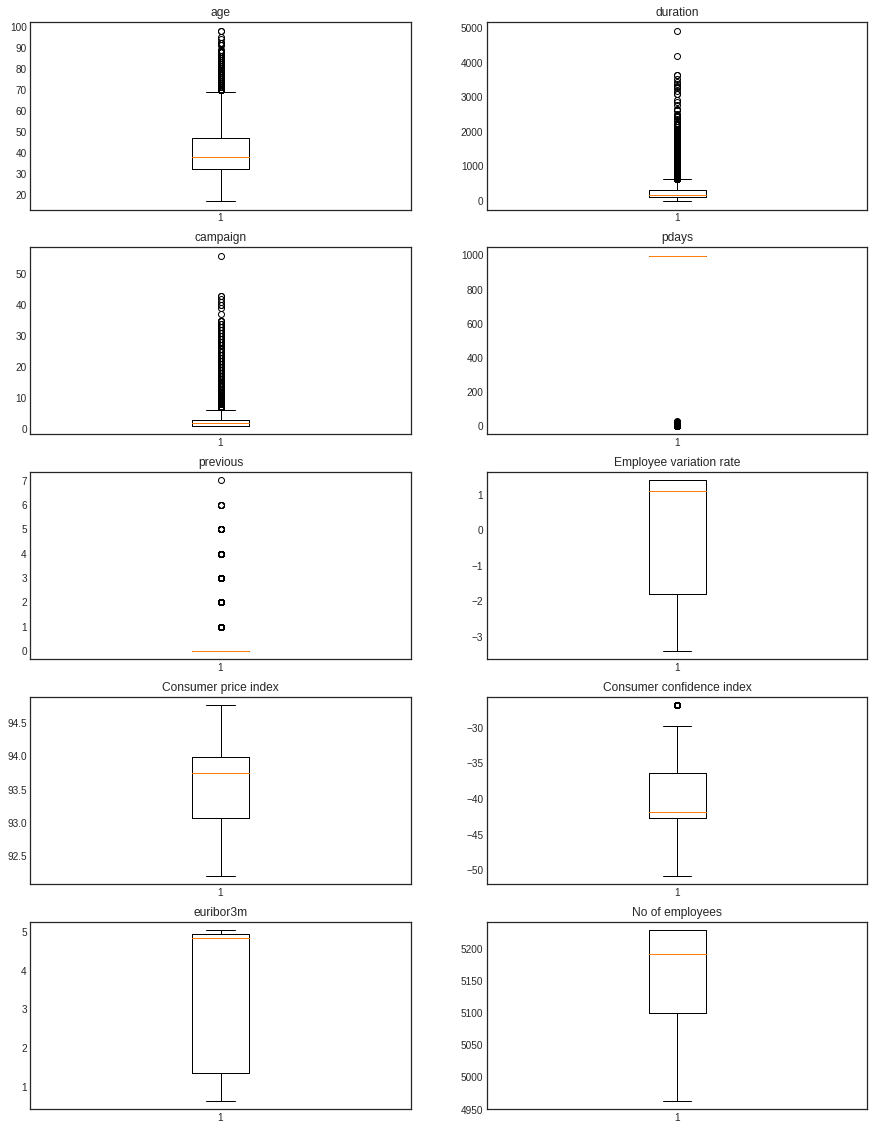

In [92]:
plt.figure(figsize = (15, 20))
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(bank['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(bank['duration'])
ax.set_title('duration')
ax=plt.subplot(523)
plt.boxplot(bank['campaign'])
ax.set_title('campaign')
ax=plt.subplot(524)
plt.boxplot(bank['pdays'])
ax.set_title('pdays')
ax=plt.subplot(525)
plt.boxplot(bank['previous'])
ax.set_title('previous')
ax=plt.subplot(526)
plt.boxplot(bank['emp_var_rate'])
ax.set_title('Employee variation rate')
ax=plt.subplot(527)
plt.boxplot(bank['cons_price_idx'])
ax.set_title('Consumer price index')
ax=plt.subplot(528)
plt.boxplot(bank['cons_conf_idx'])
ax.set_title('Consumer confidence index')
ax=plt.subplot(529)
plt.boxplot(bank['euribor3m'])
ax.set_title('euribor3m')
ax=plt.subplot(5,2,10)
plt.boxplot(bank['nr_employed'])
ax.set_title('No of employees')


## Note:
    From the above box-plots we can see that there may be presence of outliers in Age, Duration and Campaign column.
    But we leave the campaign column as its data points can't be considered as outliers.

In [93]:
from pyspark.sql import functions as f


class Outlier():

    def __init__(self, df):
        self.df = df
        
        
    def dtypes(self):
        showdf = self.df
        print(self.df.dtypes)

    def _calculate_bounds(self):
        bounds = {
            c: dict(
                zip(["q1", "q3"], self.df.approxQuantile(c, [0.25, 0.80], 0))
            )
            for c, d in zip(self.df.columns, self.df.dtypes) if d[1] in ["int", "float"]
        }

        for c in bounds:
            iqr = bounds[c]['q3'] - bounds[c]['q1']
            bounds[c]['min'] = bounds[c]['q1'] - (iqr * 1.5)
            bounds[c]['max'] = bounds[c]['q3'] + (iqr * 1.5)

        return bounds


    def _flag_outliers_df(self):
        bounds = self._calculate_bounds()

        outliers_col = [
            f.when(
                ~f.col(c).between(bounds[c]['min'], bounds[c]['max']),
                f.col(c)
            ).alias(c + '_outlier')
            for c in bounds]

        return self.df.select(*outliers_col)


    def show_outliers(self):

        outlier_df = self._flag_outliers_df()

        for outlier in outlier_df.columns:
            outlier_df.select(outlier).filter(f.col(outlier).isNotNull()).show()
            
            
    def treat_outliers(self,col1):
        bounds = self._calculate_bounds()
        treated_df = self.df.withColumn(
                            col1, 
                            f.when((self.df[col1] >bounds[col1]['max']) | (self.df[col1] < bounds [col1]['min']),
                                   f.round(f.lit(self.df.select(f.mean(F.col(col1)).alias('mean')).collect()[0]['mean'])).cast('int') ).otherwise(F.col(col1)))
        return treated_df

In [94]:
bank_final = Outlier(bank_final).treat_outliers('age')
bank_final = Outlier(bank_final).treat_outliers('duration')

In [98]:
bank_final.select(f.max(f.col('age'))).show()

+--------+
|max(age)|
+--------+
|      74|
+--------+



In [99]:
bank_final.select(f.max(f.col('duration'))).show()

+-------------+
|max(duration)|
+-------------+
|          652|
+-------------+



### Note:
We have removed the outliers using IQR method. 